In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import models
import importlib
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from matplotlib import pyplot as plt
K = tf.keras.backend

In [2]:
importlib.reload(models)

<module 'models' from '/Users/varun/School/CS182/finalproj/CS182-Spring2020-NLP-Project/models.py'>

In [3]:
df = pd.read_csv("dataset-binary.csv")
df = df.dropna()
clean_df = pd.read_csv("clean_large.csv")
clean_df = clean_df.dropna()
ultra_clean_df = pd.read_csv("ultra_clean.csv")
ultra_clean_df = ultra_clean_df.dropna()

In [4]:
train_df = df.iloc[:int(len(df) * .8)]
test_df = df.iloc[int(len(df) * .8):]
train_df_c = clean_df.iloc[:int(len(clean_df) * .8)]
test_df_c = clean_df.iloc[int(len(clean_df) * .8):]
train_df_u = ultra_clean_df.iloc[:int(len(ultra_clean_df) * .8)]
test_df_u = ultra_clean_df.iloc[int(len(ultra_clean_df) * .8):]

In [5]:
def custom_accuracy(y_true, y_pred):
        return K.sum(K.cast(K.equal(K.argmax(y_true), K.argmax(y_pred)), dtype = tf.int32)) / 32

def distance(y_true, y_pred):
        total_corr = K.sum(K.cast(K.equal(K.argmax(y_true), K.argmax(y_pred)), dtype = tf.int32))
        return K.sum(K.cast(K.abs(K.argmax(y_true) - K.argmax(y_pred)), dtype = tf.int32)) / (32 - total_corr)
    
def sum_metrics(y_true, y_pred):
        acc = (32 - K.sum(K.cast(K.equal(K.argmax(y_true), K.argmax(y_pred)), dtype = tf.int32))) / 32
        total_corr = K.sum(K.cast(K.equal(K.argmax(y_true), K.argmax(y_pred)), dtype = tf.int32))
        return acc + K.sum(K.cast(K.abs(K.argmax(y_true) - K.argmax(y_pred)), dtype = tf.int32)) / (32 - total_corr)

In [78]:
def accuracy_on_set(tokenizer, test_reviews, test_stars, model):
    test_padded = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(test_reviews), maxlen = 250, padding = 'post', truncating = 'post')
    pred = model.predict(test_padded)
    corr = 0
    for i in range(len(test_stars)):
        if np.argmax(pred[i]) == np.argmax(test_stars[i]):
            corr += 1
    print(corr / len(test_stars))
    return pred, test_stars

def distance_on_set(tokenizer, test_reviews, test_stars, model):
    test_padded = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(test_reviews), maxlen = 250, padding = 'post', truncating = 'post')
    pred = model.predict(test_padded)
    corr = 0
    dist_sum = 0
    for i in range(len(test_stars)):
        if np.argmax(pred[i]) == np.argmax(test_stars[i]):
            corr += 1
        else:
            dist_sum += np.abs(np.argmax(pred[i]) - np.argmax(test_stars[i]))
    print(dist_sum / (len(test_stars) - corr))
    return pred, test_stars
    
def sum_metric_on_set(tokenizer, test_reviews, test_stars, model):
    test_padded = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(test_reviews), maxlen = 250, padding = 'post', truncating = 'post')
    pred = model.predict(test_padded)
    corr = 0
    dist_sum = 0
    for i in range(len(test_stars)):
        if np.argmax(pred[i]) == np.argmax(test_stars[i]):
            corr += 1
        else:
            dist_sum += np.abs(np.argmax(pred[i]) - np.argmax(test_stars[i]))
    print(corr / len(test_stars))
    print(dist_sum / (len(test_stars) - corr))
    print(((dist_sum / (len(test_stars) - corr)) / 4) + 1 - (corr / len(test_stars)))
    print((dist_sum / (len(test_stars) - corr)) + 1 - (corr / len(test_stars)))
    return pred, test_stars

def sum_metric_on_set(tokenizer, test_reviews, test_stars, model, model_or_func = True):
    test_padded = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(test_reviews), maxlen = 250, padding = 'post', truncating = 'post')
    pred = None
    if model_or_func:
        pred = model.predict(test_padded)
    else:
        pred = model(test_padded)
    corr = 0
    dist_sum = 0
    for i in range(len(test_stars)):
        if np.argmax(pred[i]) == np.argmax(test_stars[i]):
            corr += 1
        else:
            dist_sum += np.abs(np.argmax(pred[i]) - np.argmax(test_stars[i]))
    print(corr / len(test_stars))
    print(dist_sum / (len(test_stars) - corr))
    print(((dist_sum / (len(test_stars) - corr)) / 4) + 1 - (corr / len(test_stars)))
    print((dist_sum / (len(test_stars) - corr)) + 1 - (corr / len(test_stars)))
    return pred, test_stars

In [7]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 5000, oov_token = '<OOV>')
tokenizer.fit_on_texts(train_df["text"])

In [8]:
b = tf.keras.models.load_model("b.h5")

In [9]:
bwcm_no_probs = tf.keras.models.load_model("bwcm_no_probs.h5", 
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [10]:
bwcm_8_probs_2 = tf.keras.models.load_model("bwcm_8_probs_2.h5", 
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [11]:
bwcm_no_probs_dr = tf.keras.models.load_model("bwcm_no_probs_dr.h5", 
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [12]:
bwcm_5_probs = tf.keras.models.load_model("bwcm_5_probs.h5", 
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [13]:
bwcm_e_probs = tf.keras.models.load_model("bwcm_e_probs.h5", 
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [14]:
bwcm_65_probs = tf.keras.models.load_model("bwcm_65_probs.h5", 
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [15]:
bwcm_65_probs_dr = tf.keras.models.load_model("bwcm_65_probs_dr.h5", 
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [16]:
bwcm_65_probs_dr_ft = tf.keras.models.load_model("bwcm_65_probs_dr_ft.h5", 
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [17]:
ft = tf.keras.models.load_model("ft.h5", 
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [18]:
bwcm_9_probs_dr = tf.keras.models.load_model("bwcm_9_probs_dr.h5",
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [41]:
bwcm_9_probs_dr_2 = tf.keras.models.load_model("bwcm_9_probs_dr_2.h5",
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [55]:
bwcm_9_probs_dr_e = tf.keras.models.load_model("bwcm_9_probs_dr_e.h5",
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [100]:
conc = tf.keras.models.load_model("conc.h5",
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [71]:
bwcm_2_probs_dr = tf.keras.models.load_model("bwcm_2_probs_dr.h5",
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [73]:
tn_4_5_differ = tf.keras.models.load_model("tn_4_5_differ.h5",
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [103]:
conc2 = tf.keras.models.load_model("conc2.h5",
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [111]:
conc3 = tf.keras.models.load_model("conc3.h5",
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [119]:
conc4 = tf.keras.models.load_model("conc4.h5",
                                            custom_objects = {'custom_accuracy' : custom_accuracy, 
                                                             'distance' : distance,
                                                             'sum_metrics' : sum_metrics})

In [43]:
b_pred , b_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                b)

0.6412
1.7536231884057971
0.7972057971014492
2.112423188405797


In [44]:
bwcm_8_pred, bwcm_8_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                bwcm_8_probs_2)

0.724
1.518840579710145
0.6557101449275362
1.7948405797101448


In [45]:
bwcm_no_p_dr_pred, bwcm_no_p_dr_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                bwcm_no_probs_dr)

0.7316
1.4411326378539493
0.6286831594634872
1.7095326378539493


In [46]:
bwcm_no_p_pred, bwcm_no_p_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                bwcm_no_probs)

0.7248
1.5087209302325582
0.6523802325581395
1.7839209302325578


In [47]:
bwcm_5_pred, bwcm_5_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                bwcm_5_probs)

0.6936
1.4530026109660574
0.6696506527415145
1.7594026109660574


In [48]:
bwcm_e_pred, bwcm_e_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                bwcm_e_probs)

0.1908
1.393475037073653
1.1575687592684132
2.202675037073653


In [49]:
bwcm_65_pred, bwcm_65_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                bwcm_65_probs)

0.728
1.463235294117647
0.6378088235294117
1.7352352941176468


In [50]:
bwcm_65_dr_pred, bwcm_65_dr_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                bwcm_65_probs_dr)

0.7268
1.4509516837481697
0.6359379209370425
1.72415168374817


In [51]:
bwcm_65_dr_ft_pred, bwcm_65_dr_ft_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                bwcm_65_probs_dr_ft)

0.7288
1.4454277286135693
0.6325569321533923
1.716627728613569


In [52]:
ft_pred, ft_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500],
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                ft)

0.1784
1.181110029211295
1.1168775073028239
2.002710029211295


In [53]:
bwcm_9_dr_pred, bwcm_9_dr_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                bwcm_9_probs_dr)

0.7324
1.4768310911808669
0.6368077727952167
1.744431091180867


In [54]:
bwcm_9_dr_2_pred, bwcm_9_dr_2_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                bwcm_9_probs_dr_2)

0.7292
1.4608567208271788
0.6360141802067948
1.731656720827179


In [56]:
bwcm_9_probs_dr_e_pred, bwcm_9_probs_dr_e_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                bwcm_9_probs_dr_e)

0.6104
1.3162217659137576
0.7186554414784394
1.7058217659137578


In [101]:
conc_pred, conc_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                conc)

0.736
1.4393939393939394
0.6238484848484849
1.7033939393939395


In [72]:
bwcm_2_probs_dr_pred, bwcm_2_probs_dr_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                bwcm_2_probs_dr)

0.0644
1.744762719110731
1.3717906797776829
2.680362719110731


In [97]:
ensemble_4_5 = models.stack_helper(models.model_to_func(b), 
                                   models.helper_binary_to_func(tn_4_5_differ, np.array([0, 0, 0, 1, 0]),
                                                               np.array([0, 0, 0, 0, 1])), 3, .4)
ensemble_4_5_pred, ensemble_4_5_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                ensemble_4_5, False)

0.6396
1.7713651498335183
0.8032412874583796
2.1317651498335186


In [105]:
conc_2_pred, conc_2_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                conc2)

0.7332
1.4587706146926536
0.6314926536731634
1.7255706146926535


In [112]:
conc_3_pred, conc_3_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                conc3)

0.7408
1.4243827160493827
0.6152956790123457
1.6835827160493828


In [120]:
conc_4_pred, conc_4_true = sum_metric_on_set(tokenizer, test_df["text"].values[:2500], 
                test_df[["stars_1.0", "stars_2.0", "stars_3.0", "stars_4.0", "stars_5.0"]].values[:2500], 
                conc4)

0.7436
1.5054602184087365
0.6327650546021841
1.7618602184087366


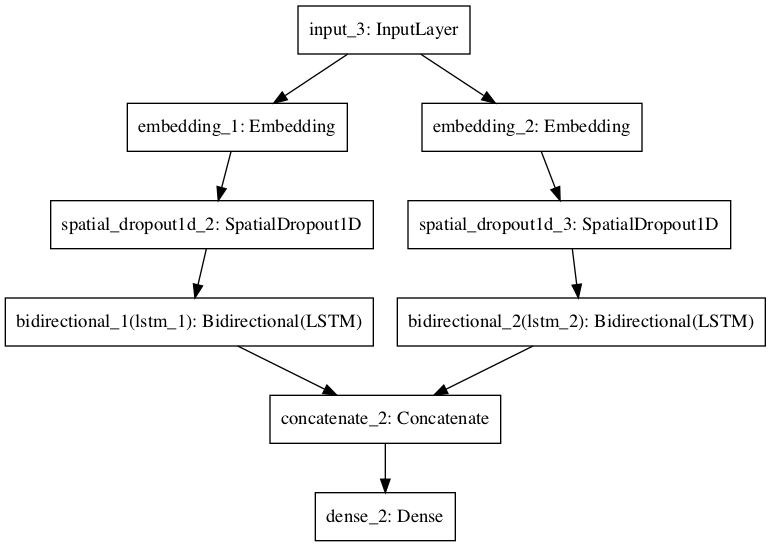

In [117]:
tf.keras.utils.plot_model(conc3, "conc3.png")